# Fashion Detection: Image Classification with CNN
authors: [@MelissaPerez09](https://github.com/MelissaPerez09), [@bl33h](https://github.com/bl33h), [@Mendezg1](https://github.com/Mendezg1)

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

In [2]:
# dirs
images_dir = "../colorful_fashion_dataset_for_object_detection/JPEGImages/"
annotations_dir = "../colorful_fashion_dataset_for_object_detection/Annotations/"
labels = "../colorful_fashion_dataset_for_object_detection/labels.txt"

In [3]:
# read labels
with open(labels, 'r') as f:
    labels = [label.strip().replace(',', '') for label in f.read().splitlines()]

# map labels to integers
label_map = {label: idx for idx, label in enumerate(labels)}

print(label_map)

{'sunglass': 0, 'hat': 1, 'jacket': 2, 'shirt': 3, 'pants': 4, 'shorts': 5, 'skirt': 6, 'dress': 7, 'bag': 8, 'shoe': 9}


In [4]:
# load image and bounding boxes
def load_image_and_boxes(image_id):
    # load image
    image_path = os.path.join(images_dir, f"{image_id}.jpg")
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # load bounding boxes (annotations xml)
    annotation_path = os.path.join(annotations_dir, f"{image_id}.xml")
    tree = ET.parse(annotation_path)
    root = tree.getroot()
    
    boxes = []
    labels = []
    
    for obj in root.findall('object'):
        label = obj.find('name').text
        bbox = obj.find('bndbox')
        
        # bounding box coordinates
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)
        
        boxes.append([xmin, ymin, xmax, ymax])
        labels.append(label_map[label])
    
    return image, boxes, labels

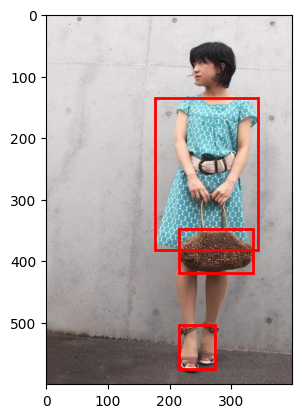

In [5]:
# visualize image and bounding boxes
image_id = "1"  # image id to visualize
image, boxes, labels = load_image_and_boxes(image_id)

plt.imshow(image)
for box in boxes:
    xmin, ymin, xmax, ymax = box
    plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, edgecolor='red', linewidth=2))
plt.show()